# Load Data and Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_excel(r'C:\\Users\Ghaza\Downloads\CDS Project\Data\Raw\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls',sheet_name = 'INX_Future_Inc_Employee_Perform')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [3]:
dfIsolationForest = df.copy()

# Remove Outlier

## Convert PerformanceRating datatype to String

In [4]:
df.PerformanceRating = df.PerformanceRating.astype(str)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Remove Outlier with IQR

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df = df.reset_index(drop=True)
df

<ipython-input-6-abd6a34661a1>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-6-abd6a34661a1>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
4,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,E100990,48,Male,Marketing,Married,Sales,Sales Executive,Travel_Rarely,2,1,...,4,12,3,3,2,2,2,2,No,3
852,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
853,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
854,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3


In [7]:
df['PerformanceRating'].value_counts()

3    634
2    120
4    102
Name: PerformanceRating, dtype: int64

# Label Encoding

Do Label Encoding for categorical variable data for EmpNumber, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, and Attrition columns

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.EmpNumber = le.fit_transform(df.EmpNumber)
df.Gender = le.fit_transform(df.Gender)
df.EducationBackground = le.fit_transform(df.EducationBackground)
df.MaritalStatus = le.fit_transform(df.MaritalStatus)
df.EmpDepartment = le.fit_transform(df.EmpDepartment)
df.EmpJobRole = le.fit_transform(df.EmpJobRole)
df.BusinessTravelFrequency = le.fit_transform(df.BusinessTravelFrequency)
df.Attrition = le.fit_transform(df.Attrition)
df.OverTime = le.fit_transform(df.OverTime)

In [9]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
4,4,27,1,1,0,1,3,1,10,2,...,3,9,4,2,9,7,1,7,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,851,48,1,2,1,5,13,2,2,1,...,4,12,3,3,2,2,2,2,0,3
852,852,27,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
853,853,37,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
854,854,50,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3


The reason why I do label encoding is because I need convert categorical variable to numerical variable to find/check correlation between variable and target/label. Also, it can be used to visualize distribution of data using pairplot(scatter plot)

## Convert PerformanceRating datatype to Int64

In [10]:
df.PerformanceRating = df.PerformanceRating.astype(np.int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpNumber                     856 non-null    int32
 1   Age                           856 non-null    int64
 2   Gender                        856 non-null    int32
 3   EducationBackground           856 non-null    int32
 4   MaritalStatus                 856 non-null    int32
 5   EmpDepartment                 856 non-null    int32
 6   EmpJobRole                    856 non-null    int32
 7   BusinessTravelFrequency       856 non-null    int32
 8   DistanceFromHome              856 non-null    int64
 9   EmpEducationLevel             856 non-null    int64
 10  EmpEnvironmentSatisfaction    856 non-null    int64
 11  EmpHourlyRate                 856 non-null    int64
 12  EmpJobInvolvement             856 non-null    int64
 13  EmpJobLevel                   856 n

In [12]:
df['PerformanceRating'].value_counts()

3    634
2    120
4    102
Name: PerformanceRating, dtype: int64

## Save to CSV

In [13]:
df.to_csv(r'C:\Users\Ghaza\Downloads\CDS Project\Data\Processed\Processed_Data.csv',index=False)

# Choose variable which has high correlation

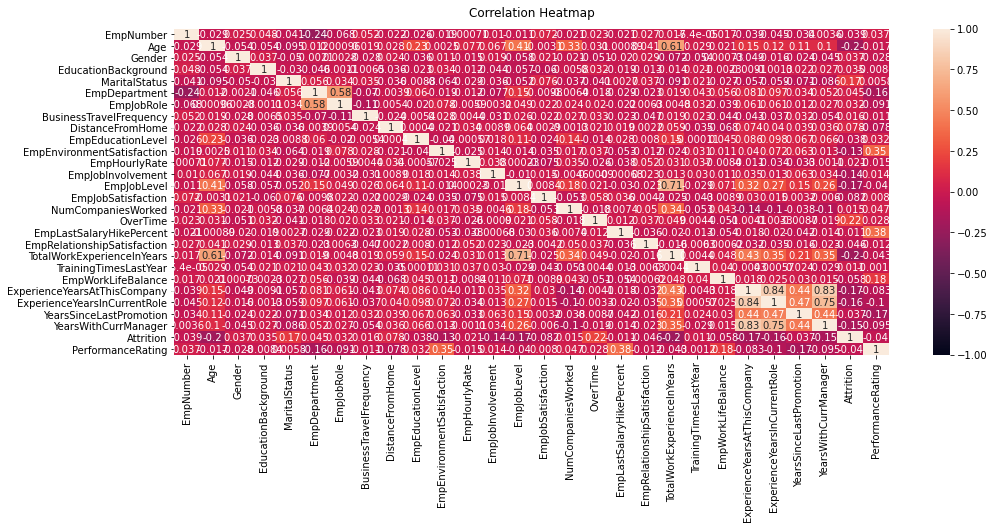

In [14]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [15]:
high_correlated_df  = df[['EmpJobLevel','ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','TotalWorkExperienceInYears','Age','EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent','EmpJobRole','EmpDepartment','PerformanceRating']]

In [16]:
high_correlated_df

,EmpJobLevel,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkExperienceInYears,Age,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpJobRole,EmpDepartment,PerformanceRating
0,2,10,7,0,8,10,32,4,12,13,5,3
1,2,7,7,1,7,20,47,4,12,13,5,3
2,3,18,13,1,12,20,40,4,21,13,5,4
3,2,2,2,2,2,10,60,1,14,13,5,3
4,3,9,7,1,7,9,27,4,21,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
851,2,2,2,2,2,12,48,2,12,13,5,3
852,2,6,5,0,4,6,27,4,20,13,5,4
853,1,1,0,0,0,4,37,4,17,15,1,3
854,1,20,8,3,8,20,50,4,11,15,1,3


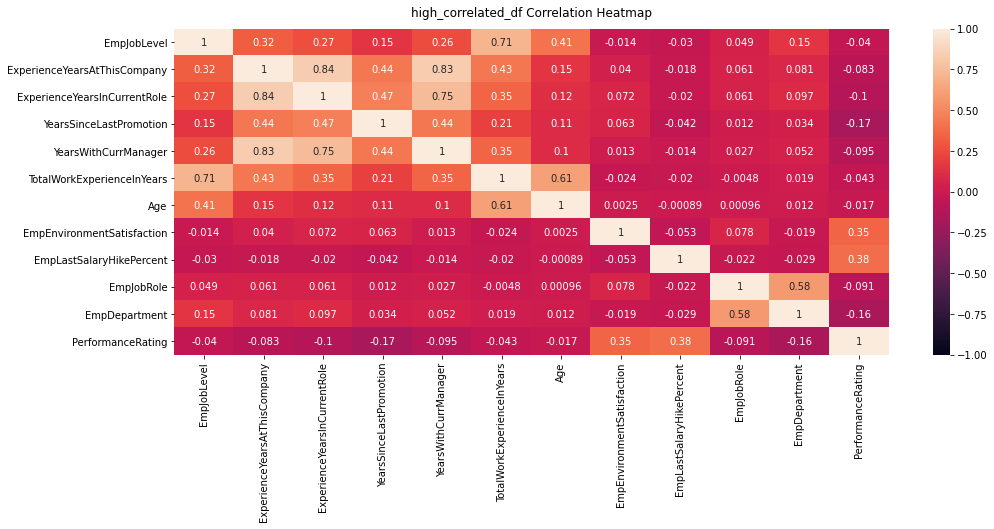

In [17]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(high_correlated_df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('high_correlated_df Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Train Test Split

In [18]:
high_correlated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpJobLevel                   856 non-null    int64
 1   ExperienceYearsAtThisCompany  856 non-null    int64
 2   ExperienceYearsInCurrentRole  856 non-null    int64
 3   YearsSinceLastPromotion       856 non-null    int64
 4   YearsWithCurrManager          856 non-null    int64
 5   TotalWorkExperienceInYears    856 non-null    int64
 6   Age                           856 non-null    int64
 7   EmpEnvironmentSatisfaction    856 non-null    int64
 8   EmpLastSalaryHikePercent      856 non-null    int64
 9   EmpJobRole                    856 non-null    int32
 10  EmpDepartment                 856 non-null    int32
 11  PerformanceRating             856 non-null    int64
dtypes: int32(2), int64(10)
memory usage: 73.7 KB


In [19]:
X = high_correlated_df.iloc[:,:-1]
Y = high_correlated_df.PerformanceRating

In [20]:
X

,EmpJobLevel,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkExperienceInYears,Age,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpJobRole,EmpDepartment
0,2,10,7,0,8,10,32,4,12,13,5
1,2,7,7,1,7,20,47,4,12,13,5
2,3,18,13,1,12,20,40,4,21,13,5
3,2,2,2,2,2,10,60,1,14,13,5
4,3,9,7,1,7,9,27,4,21,3,1
...,...,...,...,...,...,...,...,...,...,...,...
851,2,2,2,2,2,12,48,2,12,13,5
852,2,6,5,0,4,6,27,4,20,13,5
853,1,1,0,0,0,4,37,4,17,15,1
854,1,20,8,3,8,20,50,4,11,15,1


In [21]:
Y

0      3
1      3
2      4
3      3
4      4
      ..
851    3
852    4
853    3
854    3
855    3
Name: PerformanceRating, Length: 856, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [23]:
X_train

,EmpJobLevel,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkExperienceInYears,Age,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpJobRole,EmpDepartment
152,2,6,2,0,4,7,34,1,17,5,4
438,2,7,4,7,7,15,40,2,12,5,4
711,2,6,3,1,5,6,25,2,12,3,1
482,2,3,2,1,2,10,39,1,19,13,5
415,3,0,0,0,0,11,33,1,20,13,5
...,...,...,...,...,...,...,...,...,...,...,...
369,1,2,2,2,2,2,20,3,19,14,5
320,2,10,8,3,7,10,37,1,17,12,4
527,2,5,3,0,4,6,25,1,22,13,5
125,1,3,2,1,2,3,35,2,20,7,4


# Check Imbalanced Data

In [24]:
y_train.value_counts()

3    503
2     97
4     84
Name: PerformanceRating, dtype: int64

The data is imbalanced, I will resample the data using SMOTETomek Technique

## SMOTETomek

In [25]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(random_state=10)

#transform the dataset
smotetomek_X, smotetomek_Y = smotetomek.fit_resample(X_train, y_train)
#check the data y_train
pd.DataFrame(smotetomek_Y).value_counts()

PerformanceRating
2                    502
4                    500
3                    499
dtype: int64

In [28]:
smotetomek_Y = pd.DataFrame(smotetomek_Y)
smotetomek_Y

,PerformanceRating
0,3
1,2
2,3
3,2
4,4
...,...
1496,4
1497,4
1498,4
1499,4


In [29]:
smotetomek_X

,EmpJobLevel,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkExperienceInYears,Age,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpJobRole,EmpDepartment
0,2,6,2,0,4,7,34,1,17,5,4
1,2,7,4,7,7,15,40,2,12,5,4
2,2,6,3,1,5,6,25,2,12,3,1
3,2,3,2,1,2,10,39,1,19,13,5
4,3,0,0,0,0,11,33,1,20,13,5
...,...,...,...,...,...,...,...,...,...,...,...
1496,2,7,7,1,7,10,31,3,22,3,1
1497,1,5,4,0,3,6,26,4,20,11,4
1498,1,4,3,0,0,5,38,4,21,3,1
1499,2,5,4,1,2,7,32,3,24,12,4


In [32]:
y_test = pd.DataFrame(y_test)
y_test

,PerformanceRating
254,3
815,3
307,3
698,3
441,3
...,...
838,3
235,3
116,3
309,3


In [33]:
X_test

,EmpJobLevel,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkExperienceInYears,Age,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpJobRole,EmpDepartment
254,1,1,0,0,0,3,31,3,14,14,5
815,2,5,4,0,3,5,35,1,16,13,5
307,2,5,4,1,2,11,47,3,17,13,5
698,2,1,0,0,0,17,41,3,16,1,0
441,2,4,2,0,3,20,38,2,20,14,5
...,...,...,...,...,...,...,...,...,...,...,...
838,1,4,3,0,2,5,27,3,11,14,5
235,1,2,2,2,1,2,25,4,18,12,4
116,1,4,2,0,2,5,35,3,24,7,4
309,1,1,0,0,0,1,28,1,14,9,4


# Combine DataFrame

In [30]:
train_data = pd.concat([smotetomek_X, smotetomek_Y], axis = 1)
train_data

,EmpJobLevel,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkExperienceInYears,Age,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpJobRole,EmpDepartment,PerformanceRating
0,2,6,2,0,4,7,34,1,17,5,4,3
1,2,7,4,7,7,15,40,2,12,5,4,2
2,2,6,3,1,5,6,25,2,12,3,1,3
3,2,3,2,1,2,10,39,1,19,13,5,2
4,3,0,0,0,0,11,33,1,20,13,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1496,2,7,7,1,7,10,31,3,22,3,1,4
1497,1,5,4,0,3,6,26,4,20,11,4,4
1498,1,4,3,0,0,5,38,4,21,3,1,4
1499,2,5,4,1,2,7,32,3,24,12,4,4


In [35]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data = test_data.reset_index(drop=True)
test_data

,EmpJobLevel,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkExperienceInYears,Age,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpJobRole,EmpDepartment,PerformanceRating
0,1,1,0,0,0,3,31,3,14,14,5,3
1,2,5,4,0,3,5,35,1,16,13,5,3
2,2,5,4,1,2,11,47,3,17,13,5,3
3,2,1,0,0,0,17,41,3,16,1,0,3
4,2,4,2,0,3,20,38,2,20,14,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
167,1,4,3,0,2,5,27,3,11,14,5,3
168,1,2,2,2,1,2,25,4,18,12,4,3
169,1,4,2,0,2,5,35,3,24,7,4,3
170,1,1,0,0,0,1,28,1,14,9,4,3


## Saved to train_data.csv and test_data.csv

In [36]:
train_data.to_csv(r'C:\Users\Ghaza\Downloads\CDS Project\Data\Processed\train_data.csv',index=False)
test_data.to_csv(r'C:\Users\Ghaza\Downloads\CDS Project\Data\Processed\test_data.csv',index=False)